# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis
1. The maximum temperature is at its peak around 20 degrees latitude. This is primarily because it is summertime in the northern hemisphere at the time of this analysis. 

2. The maximum temperatures are primarily located at the equators in both the northern and southern hemespheres. 

3. Windspeeds are much stronger in the southern hempesphere than in the northern hemesphere as you increase the latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Building weather_url
url ="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Concatinating weather_url_query
weather_query_url=(f"{url}appid={weather_api_key}&units={units}&q=")

# Print statements to begin API retrieval 
print("Beginning of Data Retrieval")
print("---------------------------")

# Creating empty lists to populate when calling weather_api
city_list = []
cloudiness = []
country = []
date = []
humidity = []
latitude =[]
longitude =[]
max_temp = []
wind_speed = []
index_list = 0

record = 1

# For loop to call the API
for city in cities: 
    try: 
# requesting from API to search each city in the list cities
        response = requests.get(weather_query_url + city).json()
#       Appending information to empty lists as calls are concluded
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"] ["speed"])
        #if statement to set the index lists
        if index_list == 50:
            index_list = 0
            record = record+1
        else: 
            index_list = index_list+1
#       setting a sleep time of one second to limit my API calls
        time.sleep (1.01)
#       printing the city
        print(index_list, city)
# except errors for city's not found in the API call
    except KeyError: 
        print("City not found ...")
    continue
        
    

Beginning of Data Retrieval
---------------------------
1 lavrentiya
City not found ...
2 serik
3 punta arenas
4 husavik
City not found ...
5 el dorado
6 jamestown
7 kapaa
8 rio grande
9 atuona
10 hithadhoo
11 vila franca do campo
12 kalmunai
13 nemuro
14 hermanus
15 bluff
16 upernavik
17 wajir
18 ixtapa
19 rikitea
20 ushuaia
21 yellowknife
22 dapdap
23 albany
24 talhar
City not found ...
25 callaguip
26 beringovskiy
27 torbay
28 jalu
29 vardo
30 hobart
31 acapulco
32 ribeira grande
33 ninh binh
City not found ...
City not found ...
34 cherskiy
35 mataura
36 middleton
37 vaini
38 dongsheng
39 butaritari
40 ikalamavony
41 kodiak
42 new norfolk
43 cabedelo
44 honningsvag
45 kyabe
46 arlit
47 hobyo
48 port alfred
49 caxito
City not found ...
50 tessalit
City not found ...
0 bredasdorp
1 nikolskoye
2 zadar
City not found ...
3 thompson
4 mairana
5 carballo
6 coquimbo
City not found ...
7 lebu
8 kavaratti
9 avarua
10 alexandria
11 longyearbyen
12 hasaki
13 kenai
14 puerto ayora
15 hovd
16 b

31 wad rawah
32 gusinoye ozero
33 ampanihy
34 blackwater
City not found ...
35 santa maria
36 key west


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating the weather dictionary
weather_dict = {"City": city_list,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Latitude": latitude, 
               "Longitude": longitude, 
               "Max Temp": max_temp, 
               "Wind Speed": wind_speed}
# creating the dataframe
weather_df = pd.DataFrame(weather_dict)
# counting to ensure the dataframe is populated
weather_df.count()

City          597
Cloudiness    597
Country       597
Date          597
Humidity      597
Latitude      597
Longitude     597
Max Temp      597
Wind Speed    597
dtype: int64

In [6]:
# exporting the dataframe
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Getting the indices of cities that have humidity under 100%.
humidity_under_100_df=weather_df.loc[weather_df["Humidity"]<=100]
humidity_under_100_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Lavrentiya,0,RU,1597115437,70,65.58,-171.00,53.37,10.07
1,Serik,4,TR,1597115438,73,36.92,31.10,75.20,4.70
2,Punta Arenas,100,CL,1597115284,89,-53.15,-70.92,32.00,9.17
3,Husavik,100,IS,1597115441,67,66.04,-17.34,59.00,10.29
4,El Dorado,1,US,1597115151,94,33.21,-92.67,78.80,3.83
...,...,...,...,...,...,...,...,...,...
592,Gusinoye Ozero,0,RU,1597116112,48,51.11,106.26,70.20,4.45
593,Ampanihy,15,MG,1597116113,93,-24.70,44.75,57.67,2.71
594,Blackwater,0,AU,1597116114,37,-23.58,148.88,68.68,2.35
595,Santa Maria,100,BR,1597116115,37,-29.68,-53.81,82.40,13.87


In [8]:
#  Getting the indices of cities that have humidity over 100%.
city_humidity_over_100=weather_df.loc[weather_df["Humidity"]>100].index
city_humidity_over_100

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity_outliers=weather_df["Humidity"]
humidity_outliers
quartiles= humidity_outliers.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_index=weather_df.loc[(weather_df["Humidity"]<humidity_lower_bound) & (weather_df["Humidity"]>humidity_upper_bound)].index
outliers_index



city_humidity_data = weather_df.drop(outliers_index, inplace=False)
clean_city_data=city_humidity_data.sort_values("Humidity", ascending=False)
clean_city_data

clean_city_data.sort_values("Humidity", ascending = False)

19.5 and 127.5 are the outliers


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
473,Barcelos,75,PT,1597115976,100,41.54,-8.62,63.00,10.29
192,Grindavik,90,IS,1597115656,100,63.84,-22.43,51.80,20.80
231,Klaksvík,37,FO,1597115701,100,62.23,-6.59,53.60,6.93
180,Wundanyi,32,KE,1597115643,100,-3.40,38.36,52.75,3.09
556,Sept-Îles,20,CA,1597115962,100,50.20,-66.38,62.01,8.05
...,...,...,...,...,...,...,...,...,...
86,Corrales,1,US,1597115537,15,35.24,-106.61,86.00,3.40
309,Mīrābād,15,AF,1597115789,14,30.44,61.84,90.25,26.40
209,Araouane,83,ML,1597115676,12,18.90,-3.53,93.78,4.63
139,Taoudenni,0,ML,1597115597,11,22.68,-3.98,92.77,11.25


In [10]:
# Extract relevant fields from the data frame
city_weather_df=clean_city_data[["Latitude","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_weather_df

# Export the City_Data into a csv
city_weather_df.to_csv("../output_data/City_Weather_Data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

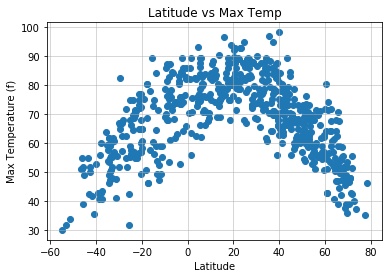

The correlation coefficient between Latitude and Max Temp is -0.02


In [25]:
# Creating the scatterplot of Latitude vs temperature
plt.scatter(city_weather_df["Latitude"],city_weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()



## Latitude vs. Humidity Plot

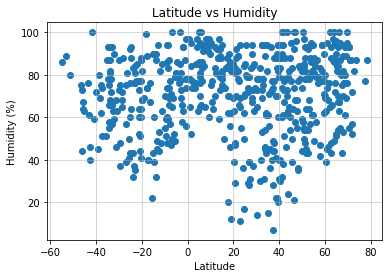

In [12]:
# Creating the scatterplot of Latitude vs humidty
plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

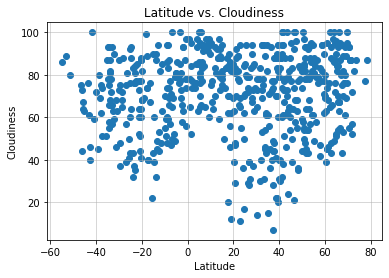

In [13]:
# Creating the scatterplot of Latitude vs cloudiness
plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

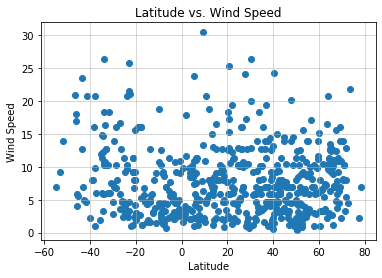

In [14]:
# Creating the scatterplot of Latitude vs windspeed
plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("../Images/Latitude vs Windspeed.png")

plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# finding the northern hemisphere lats
northern_hemisphere=city_weather_df.loc[city_weather_df["Latitude"]>=0]
northern_hemisphere

,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
473,41.54,63.00,100,75,10.29
192,63.84,51.80,100,90,20.80
231,62.23,53.60,100,37,6.93
556,50.20,62.01,100,20,8.05
120,41.37,73.00,100,1,3.80
...,...,...,...,...,...
86,35.24,86.00,15,1,3.40
309,30.44,90.25,14,15,26.40
209,18.90,93.78,12,83,4.63
139,22.68,92.77,11,0,11.25


In [16]:
# finding the southern hemisphere lats
southern_hemisphere=city_weather_df.loc[city_weather_df["Latitude"]<=0]
southern_hemisphere

,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
180,-3.40,52.75,100,32,3.09
42,-6.98,71.60,100,75,6.93
99,-41.87,42.01,100,75,4.70
54,-18.12,50.88,99,13,2.66
64,-0.74,66.00,97,86,3.00
...,...,...,...,...,...
594,-23.58,68.68,37,0,2.35
274,-23.13,71.60,35,0,3.36
581,-13.85,84.20,32,23,12.75
135,-23.70,75.00,32,90,20.80


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

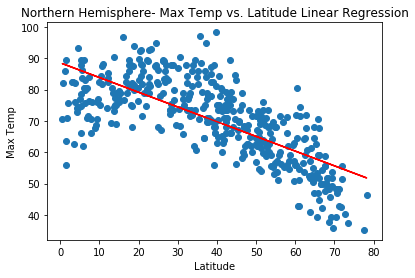

The correlation coefficient between Latitude and Max Temp is -0.02


In [26]:
# creating the line regression of the northern hemisphere
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Max Temp vs. Latitude Linear Regression).png")
%matplotlib inline

print(f"The correlation coefficient between Latitude and Max Temp is {round(st.pearsonr(latitude, max_temp)[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

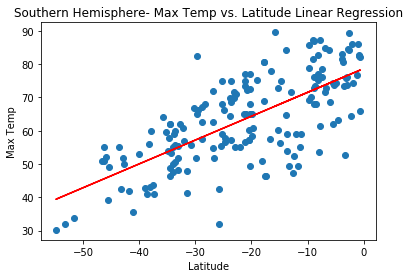

The correlation coefficient between Latitude and Max Temp is -0.02


In [27]:
# creating the line regression of the southern hemisphere
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Max Temp vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Max Temp is {round(st.pearsonr(latitude, max_temp)[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

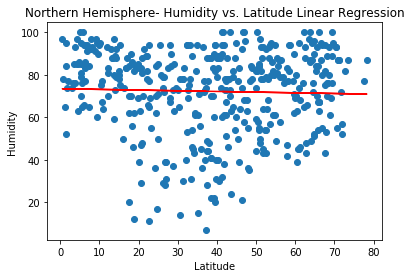

The correlation coefficient between Latitude and Max Temp is 0.06


In [28]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Humidity vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Humidity is {round(st.pearsonr(latitude, humidity)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

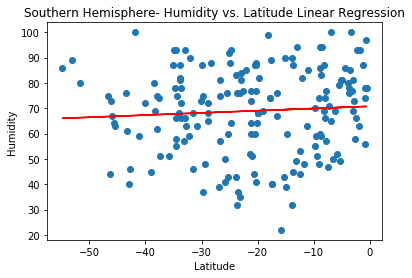

The correlation coefficient between Latitude and Max Temp is 0.06


In [30]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Humidity vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Humidity is {round(st.pearsonr(latitude, humidity)[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

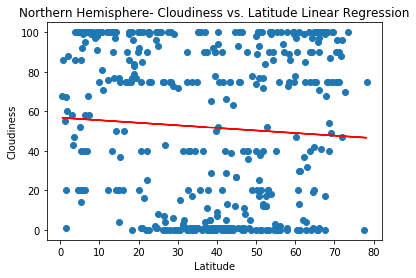

The correlation coefficient between Latitude and Max Temp is 0.12


In [31]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Cloudiness vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Cloudiness is {round(st.pearsonr(latitude, cloudiness)[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

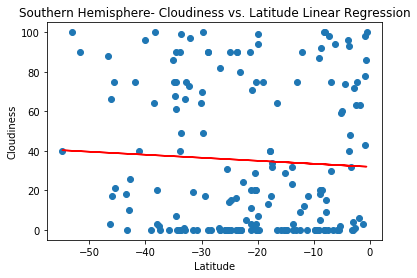

The correlation coefficient between Latitude and Max Temp is 0.12


In [32]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Cloudiness vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Cloudiness is {round(st.pearsonr(latitude, cloudiness)[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

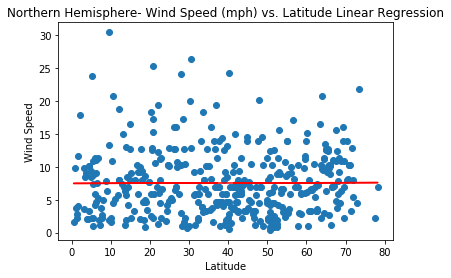

The correlation coefficient between Latitude and Max Temp is -0.06


In [33]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Wind Speed (mph) vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(latitude, wind_speed)[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

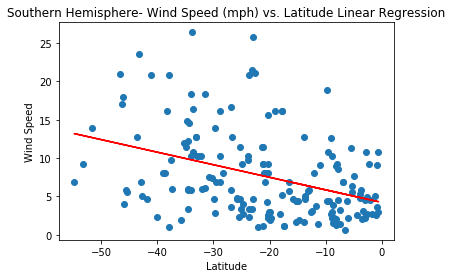

The correlation coefficient between Latitude and Max Temp is -0.06


In [34]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Wind Speed (mph) vs. Latitude Linear Regression).png")
%matplotlib inline
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(latitude, wind_speed)[0],2)}")